In [ ]:
from PIL import Image
from sklearn.cluster import KMeans
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

file_ = files.upload()

Saving cat_1.jpg to cat_1 (1).jpg
Saving cat_2.jpg to cat_2 (1).jpg
Saving cat_3.jpg to cat_3 (1).jpg


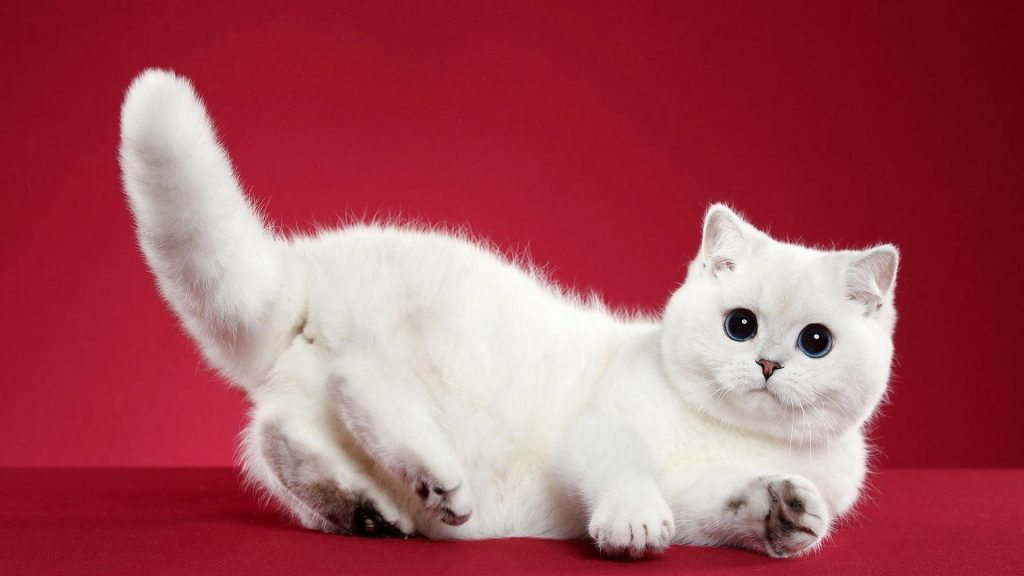

In [ ]:
img1 = Image.open('cat_1.jpg')
img1

#Кластеризация

In [ ]:
def clst(pix, n_clusters):
  data = [(x, y, pix[x, y][0], pix[x, y][1], pix[x, y][2]) for x in range(pix.shape[0]) for y in range(pix.shape[1])]
  print(data)
  
  kmeans=KMeans(n_clusters=n_clusters)
  km_clusters=kmeans.fit_predict(data)

  #Присваиваем каждому пикселю цвет соответствующего кластера
  for p, c in zip(data, km_clusters):
      pix[p[0], p[1]] = (kmeans.cluster_centers_[c, 2],
                         kmeans.cluster_centers_[c, 3],
                         kmeans.cluster_centers_[c, 4]
                        )
  plt.imshow(pix)
  return kmeans, km_clusters, kmeans.cluster_centers_

#Подбираем количество кластеров

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



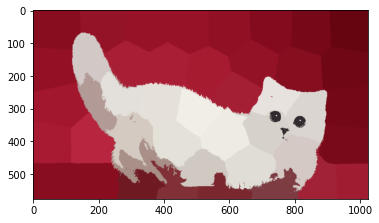

In [ ]:
#Elbow Method
np.random.seed(1)

crit = []
for n_clusters in range(5, 46, 5):
  pix1 = np.array(img1) 
  db_1, clusters_1, centers_1 = clst(pix1, n_clusters)
  crit.append(np.sqrt(db_1.inertia_))

Text(0, 0.5, 'Loss function')

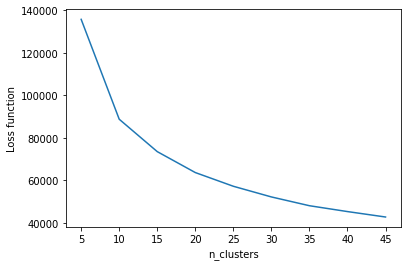

In [ ]:
plt.plot(range(5, 46, 5), crit)
plt.xlabel('n_clusters')
plt.ylabel('Loss function')

#Подберем цвет для объекта, обнаружим его на картинке

In [ ]:
def selection(image, cluster_centers):
  #Подбираем цвет объекта на картинке
  #Если в кластер соответствует нужному объекту, добавляем его номер в tmp
  tmp = []
  for i, c in enumerate(cluster_centers):
      if (abs(c[2] - 210) + abs(c[3] - 200) + abs(c[4] - 200) < 60
          or abs(c[2] - 230) + abs(c[3] - 230) + abs(c[4] - 230) < 20
          or abs(c[2] - 190) + abs(c[3] - 170) + abs(c[4] - 170) < 30
          or abs(c[2] - 170) + abs(c[3] - 150) + abs(c[4] - 150) < 60
          or abs(c[2] - 130) + abs(c[3] - 110) + abs(c[4] - 110) < 60
          or abs(c[2] - 70) + abs(c[3] - 55) + abs(c[4] - 50) < 50):
        tmp.append(i)

  return tmp

#Заданный объект оставляем цветным, остальное делаем серым

In [ ]:
def img_done(image, km_clusters, cluster_centers):
  pix = np.array(image)

  data = [(x, y, pix[x, y][0], pix[x, y][1], pix[x, y][2]) for x in range(pix.shape[0]) for y in range(pix.shape[1])]

  tmp = selection(image, cluster_centers)

  pix_new = np.zeros(pix.shape, np.uint8)

  p_c = image.load()
  #делаем изначальную картинку серой, складывая 3 канала цвета и деля на кол-во каналов
  rgb_to_gray = np.array([[int((p_c[x, y][0] + p_c[x, y][1] + p_c[x, y][2]) / 3) for x in range(image.size[0])] for y in range(image.size[1])])  

  #Делаем пиксель новой картинки цветным, если номер кластера есть в tmp
  #Иначе делаем пиксель серым
  for p, c in zip(data, km_clusters):
    if c in tmp:
      pix_new[p[0], p[1]] = (int(pix[p[0], p[1]][0]),
                            int(pix[p[0], p[1]][1]),
                            int(pix[p[0], p[1]][2]))
    else:
      pix_new[p[0], p[1]] = (int(rgb_to_gray[p[0], p[1]]),
                            int(rgb_to_gray[p[0], p[1]]),
                            int(rgb_to_gray[p[0], p[1]]))
      
  return pix_new

In [ ]:
def result(img):
  pix = np.array(img)
  kmeans, km_clusters, centers = clst(pix, n_clusters=30)
  plt.imshow(img_done(img, km_clusters, centers))

#Результат

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



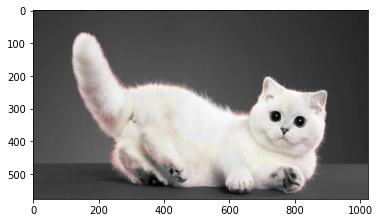

In [ ]:
result(img1)

#Еще 2 картинки

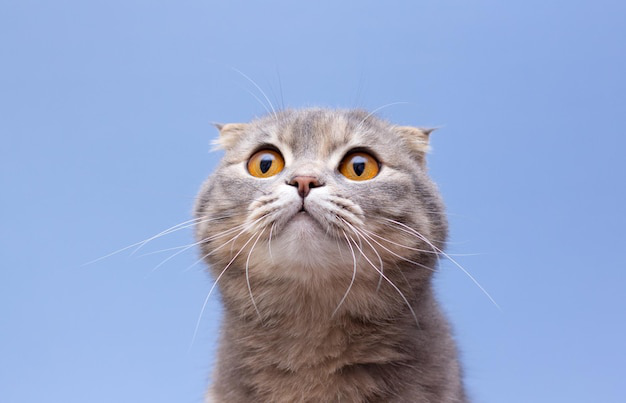

In [ ]:
img2 = Image.open('cat_3.jpg')
img2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



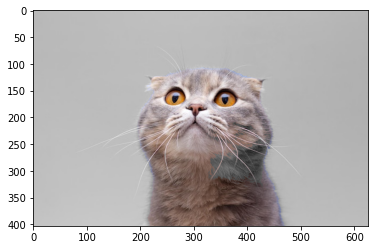

In [ ]:
result(img2)

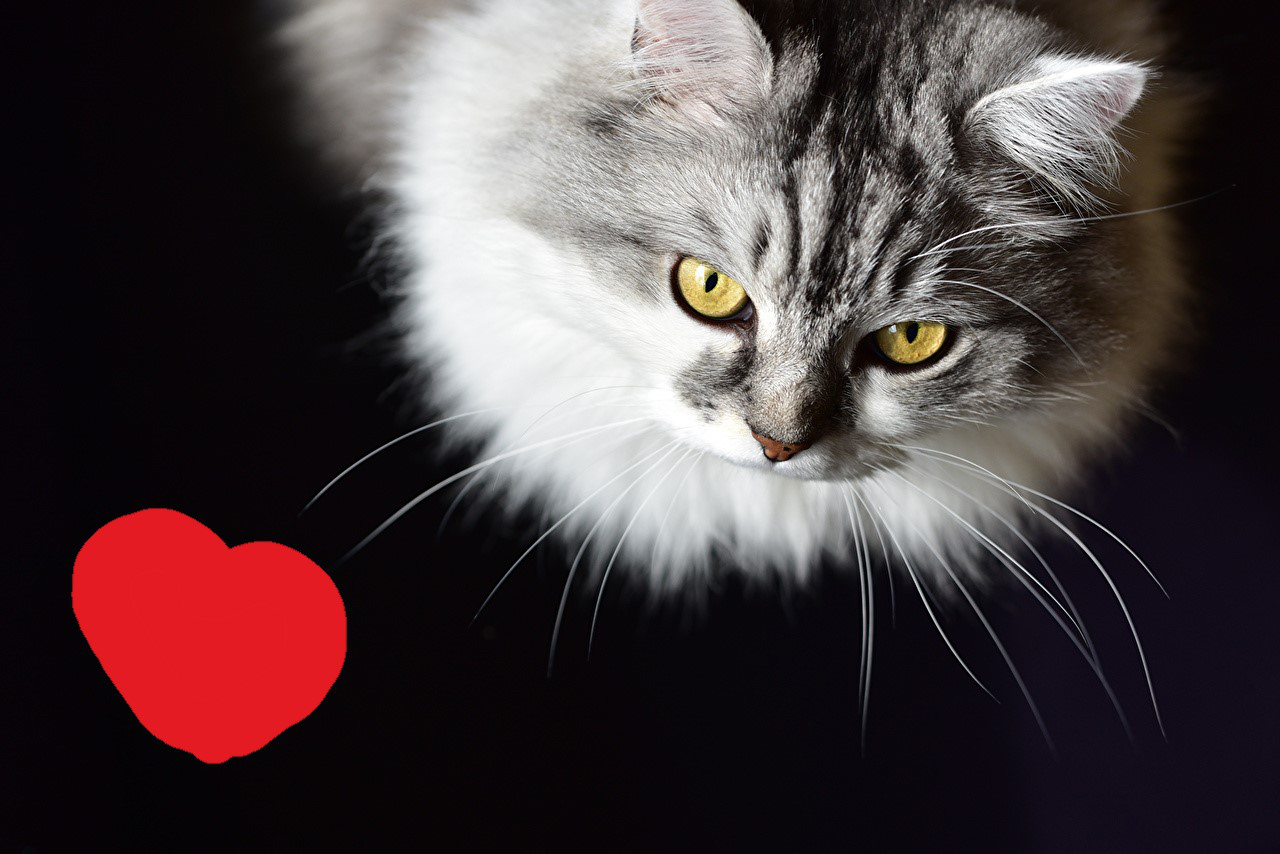

In [ ]:
img3 = Image.open('cat_2.jpg')
img3

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



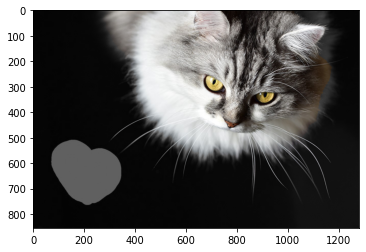

In [ ]:
result(img3)